<a href="https://colab.research.google.com/github/albanda/CE888/blob/master/lab2%20-%20bootstrap/bootstrap.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In this notebook you'll create your own bootstrap function following the bootstrap algorithm (check the lecture notes!)

In [1]:
import matplotlib
import pandas as pd
import seaborn as sns
import numpy as np



In [2]:
# Load the data
df = pd.read_csv('https://raw.githubusercontent.com/albanda/CE888/master/lab2%20-%20bootstrap/customers.csv')
data = df.values.T[1]

In [3]:
data

array([ 2.,  8., 20., 13.,  5.,  9., 10.,  8., 22., 10.,  2.,  4.,  7.,
        9.])

In [4]:
# Checking the notes from the lecture, create here your own bootstrap function:
# 1. Sample from the input array x to create an array of samples of shape (n_bootstraps, sample_size)
# Hint: Check the function random.choice() on Numpy
# 2. Calculate and save the mean of the array (this is "data_mean" that is returned by the function)
# 3. Calculate the mean from each bootstrap (i.e., row) and store it.
# (This should be an array of n_bootstraps values)
# 4. Calculate the lower and upper bounds for a 95% CI (hint: check the percentile function on Numpy)
# 5. Return data_mean, and the lower and upper bounds of your interval
def bootstrap_mean(x, sample_size, n_bootstraps):
    sample=np.random.choice(x,size=(n_bootstraps,sample_size))
    data_mean=np.average(sample)
    boot_strap_mean=[]
    for i in sample:
        boot_strap_mean.append(np.array(i).mean())
        
    #print(boot_strap_mean)
    
    alpha=95
    
    lower = np.percentile(boot_strap_mean, (100-alpha)/2)
    upper = np.percentile(boot_strap_mean, alpha+((100-alpha)/2))
    
    #print(data_mean,lower,upper)

    return data_mean, lower, upper


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(0.0, 50000.0)

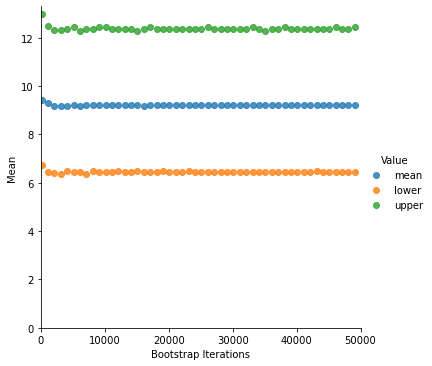

In [5]:
# Call your bootstrap function and plot the results

boots = []
for i in range(100, 50000, 1000):
    boot = bootstrap_mean(data, data.shape[0], i)
    boots.append([i, boot[0], "mean"])
    boots.append([i, boot[1], "lower"])
    boots.append([i, boot[2], "upper"])

df_boot = pd.DataFrame(boots, columns=['Bootstrap Iterations', 'Mean', "Value"])
sns_plot = sns.lmplot(df_boot.columns[0], df_boot.columns[1], data=df_boot, fit_reg=False, hue="Value")

sns_plot.axes[0, 0].set_ylim(0,)
sns_plot.axes[0, 0].set_xlim(0, 50000)



Now, modify the bootstrap function you created above so that you can pass your desired confidence interval as a parameter.



In [6]:
def bootstrap_mean_ci(x, sample_size, n_bootstraps, ci):

    sample=np.random.choice(x,size=(n_bootstraps,sample_size))
    data_mean=np.average(sample)
    boot_strap_mean=[]
    for i in sample:
        boot_strap_mean.append(np.array(i).mean())
        
    #print(boot_strap_mean)
    
    
    
    lower = np.percentile(boot_strap_mean, (100-ci)/2)
    upper = np.percentile(boot_strap_mean, ci+((100-ci)/2))
    
    #print(data_mean,lower,upper)

    return data_mean, lower, upper


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(0.0, 50000.0)

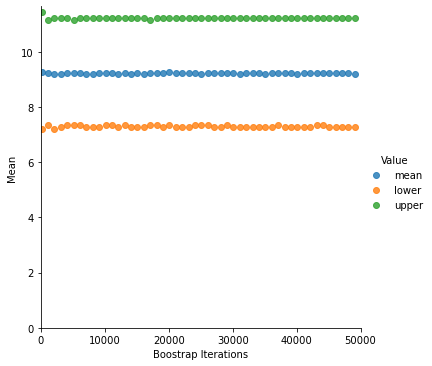

In [7]:
boots = []
for i in range(100, 50000, 1000):
    boot = bootstrap_mean_ci(data, data.shape[0], i, 80)
    boots.append([i, boot[0], "mean"])
    boots.append([i, boot[1], "lower"])
    boots.append([i, boot[2], "upper"])

df_boot = pd.DataFrame(boots, columns=['Boostrap Iterations', 'Mean', "Value"])
sns_plot = sns.lmplot(df_boot.columns[0], df_boot.columns[1], data=df_boot, fit_reg=False, hue="Value")

sns_plot.axes[0, 0].set_ylim(0,)
sns_plot.axes[0, 0].set_xlim(0, 50000)

#sns_plot.savefig("bootstrap_confidence_80.pdf", bbox_inches='tight')


# Vehicles dataset

Now let's work on a different dataset, which is stored in the vehicles.csv file.


In [8]:
# Load and visualise the vehicles dataset
# To load the dataset: https://neptune.ai/blog/google-colab-dealing-with-files (check section "Load individual files directly from GitHub")


# Note that the current and new fleets are in different columns and have different lengths, so bear this in mind when you're plotting.
# You can create separate scatterplots for the two fleets, as you would with the histograms, 
# or plot them both in one plot (but not one against the other).
# <---INSERT YOUR CODE HERE--->
# Note: you can add more cells as needed to organise your code and your plots


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2056: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distr

<AxesSubplot:>

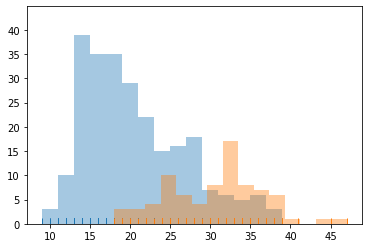

In [30]:
# <---INSERT YOUR CODE HERE--->
df = pd.read_csv('https://raw.githubusercontent.com/albanda/CE888/master/lab2%20-%20bootstrap/vehicles.csv')
curr_fleet = df[df.columns[0]].dropna().values
sns.distplot(curr_fleet, bins=15, kde=False, rug=True) # Histogram
new_fleet = df[df.columns[1]].dropna().values
sns.distplot(new_fleet, bins=15, kde=False, rug=True) # Histogram

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


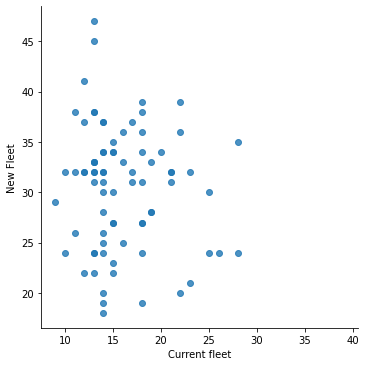

In [31]:
sns.lmplot(df.columns[0], df.columns[1], data=df, fit_reg=False)

## Compare the two fleets

The business analysts come up a comparison algorithm that requires the upper and lower bounds for the mean in order to say which fleet is better.
1. Calculate the mean of both samples.
2. Using the bootstrap function that you created:
    - Construct the 95% CI of the mean of the current fleet.
    - Construct the 95% CI of the mean of the new fleet.
    - Are they comparable? (i.e., is one better than the other?) -- you can do this with a permutation test (check the lecture notes!)

In [32]:

mean,lower,upper=(bootstrap_mean_ci(curr_fleet, curr_fleet.shape[0], 50000, 95))
print('------------------------------------------Current fleet-------------------------------------------------------------------')
print("Mean =",mean)
print("Lower bound =",lower)
print("Upper bounf =",upper)


print('------------------------------------------new fleet-------------------------------------------------------------------')
mean,lower,upper=(bootstrap_mean_ci(new_fleet, new_fleet.shape[0], 50000, 95))
print("Mean =",mean)
print("Lower bound =",lower)
print("Upper bounf =",upper)

------------------------------------------Current fleet-------------------------------------------------------------------
Mean = 20.14486722891566
Lower bound = 19.36144578313253
Upper bounf = 20.951807228915662
------------------------------------------new fleet-------------------------------------------------------------------
Mean = 30.48433417721519
Lower bound = 29.139240506329113
Upper bounf = 31.810126582278482


In [33]:
def observed(old,new):
    mean_old= np.mean(old)
    mean_new = np.mean(new)
    obs = mean_new - mean_old
    
    return obs

In [34]:
# Create your own function for a permutation test here (you will need it for the lab quiz!):
# Create your own function for a permutation test here (you will need it for the lab quiz!):
def permut_test(sample1, sample2, n_permutations):
    """
    sample1: 1D array
    sample2: 1D array (note that the size of the two arrays can be different)
    n_permutations: number of permutations to calculate the p-value
    """
    t_obs = observed(sample1, sample2)
    concat = np.concatenate((sample1, sample2))
    count = 0
    
    for i in range(n_permutations):
        perm = np.random.permutation(concat)
        perm_old = perm[:int(len(perm)/2)]
        perm_new = perm[int(len(perm)/2):]
        t_perm_obs = observed(perm_old, perm_new)
        
        if t_perm_obs > t_obs:
            count += 1
    p_value = count/n_permutations
    
    return p_value

In [35]:
new_fleet = df[df.columns[0]]
curr_fleet = df[df.columns[1]]
pvalue = permut_test(new_fleet, curr_fleet, 50000)
print("p-value =",pvalue)

p-value = 0.0


# Quiz answers

2. The 92% confidence interval for the mean of the old fleet in the vehicles dataset using 10000 iterations is (Answer
   , Answer
   ). Give your answer including the first two decimal points (e.g., 1.23).

In [39]:
print('------------------------------------------new fleet-------------------------------------------------------------------')
mean,lower,upper=(bootstrap_mean_ci(new_fleet, new_fleet.shape[0], 10000, 92))
print("Mean =",mean)
print("Lower bound =",lower)
print("Upper bounf =",upper)

------------------------------------------new fleet-------------------------------------------------------------------
Mean = 20.143242570281124
Lower bound = 19.445622489959838
Upper bounf = 20.863453815261042


3. The 80% confidence interval for the mean of the customers dataset using 10000 iterations is (Answer
   , Answer
   ). Give your answer including the first two decimal points (e.g., 1.23).

In [47]:
df = pd.read_csv('https://raw.githubusercontent.com/albanda/CE888/master/lab2%20-%20bootstrap/customers.csv')
data = df.values.T[1]
mean,lower,upper = bootstrap_mean_ci(data, data.shape[0],10000,80)
print("Mean =",mean)
print("Lower bound =",lower)
print("Upper bounf =",upper)


Mean = 9.21347142857143
Lower bound = 7.285714285714286
Upper bounf = 11.214285714285714


4. The 73% confidence interval for the standard deviation of the new fleet in the vehicles dataset using 10000 iterations is     (Answer
   , Answer
   ). Give your answer including the first two decimal points (e.g., 1.23).

In [60]:
def bootstrap_std_ci(x, sample_size, n_bootstraps, ci):

    sample=np.random.choice(x,size=(n_bootstraps,sample_size))
    
    data_std=np.std(sample)
    
    boot_strap_std=[]
    for i in sample:
        boot_strap_std.append(np.array(i).std())
        
    #print(boot_strap_mean)
    
    
    
    lower = np.percentile(boot_strap_std, (100-ci)/2)
    upper = np.percentile(boot_strap_std, ci+((100-ci)/2))
    
    #print(data_mean,lower,upper)

    return data_std, lower, upper

In [61]:
df = pd.read_csv('https://raw.githubusercontent.com/albanda/CE888/master/lab2%20-%20bootstrap/vehicles.csv')
new_fleet = df[df.columns[1]].dropna().values
std,lower,upper = bootstrap_std_ci(new_fleet, new_fleet.shape[0],10000,73)
print("std =",std)
print("Lower bound =",lower)
print("Upper bounf =",upper)

std = 6.062604632986363
Lower bound = 5.5081530512958885
Upper bounf = 6.506693827931036


5. The 99% confidence interval for the standard deviation of the old fleet in the vehicles dataset using 10000 iterations is (Answer
   , Answer
   ). Give your answer including the first two decimal points (e.g., 1.23).

In [63]:
df = pd.read_csv('https://raw.githubusercontent.com/albanda/CE888/master/lab2%20-%20bootstrap/vehicles.csv')
old_fleet = df[df.columns[0]].dropna().values
std,lower,upper = bootstrap_std_ci(old_fleet, old_fleet.shape[0],10000,99)
print("std =",std)
print("Lower bound =",lower)
print("Upper bounf =",upper)

std = 6.4011998468403455
Lower bound = 5.608128517106063
Upper bounf = 7.115675173781451


8. The data for this question is in voting_data.py.

   The file contains data for the 2008 US presidential election results from the “swing states” of PA and OH, specifically, the    percentage of voters who voted for the Democrats within each county in a given state. There are Answer
   values (i.e., states) in PA and Answer
   in OH.
   
   The 90% confidence intervals for the means of the votes using 25000 bootstraps are (give two decimal values, e.g., 1.23):

    For OH: (Answer
    , Answer
    )

    For PA: (Answer
    , Answer
    )

    The p-value from a permutation test with 20000 permutations is Answer
     (give 3 decimal points, e.g., 0.456). Since this value is Answer

     0.1 (our significance level)

In [69]:
# The variables below represent the percentages of democratic votes in Pennsylvania and Ohio (one value for each state).
dem_share_PA = [60.08, 40.64, 36.07, 41.21, 31.04, 43.78, 44.08, 46.85, 44.71, 46.15, 63.10, 52.20, 43.18, 40.24, 39.92, 47.87, 37.77, 40.11, 49.85, 48.61, 38.62, 54.25, 34.84, 47.75, 43.82, 55.97, 58.23, 42.97, 42.38, 36.11, 37.53, 42.65, 50.96, 47.43, 56.24, 45.60, 46.39, 35.22, 48.56, 32.97, 57.88, 36.05, 37.72, 50.36, 32.12, 41.55, 54.66, 57.81, 54.58, 32.88, 54.37, 40.45, 47.61, 60.49, 43.11, 27.32, 44.03, 33.56, 37.26, 54.64, 43.12, 25.34, 49.79, 83.56, 40.09, 60.81, 49.81]
dem_share_OH = [56.94, 50.46, 65.99, 45.88, 42.23, 45.26, 57.01, 53.61, 59.10, 61.48, 43.43, 44.69, 54.59, 48.36, 45.89, 48.62, 43.92, 38.23, 28.79, 63.57, 38.07, 40.18, 43.05, 41.56, 42.49, 36.06, 52.76, 46.07, 39.43, 39.26, 47.47, 27.92, 38.01, 45.45, 29.07, 28.94, 51.28, 50.10, 39.84, 36.43, 35.71, 31.47, 47.01, 40.10, 48.76, 31.56, 39.86, 45.31, 35.47, 51.38, 46.33, 48.73, 41.77, 41.32, 48.46, 53.14, 34.01, 54.74, 40.67, 38.96, 46.29, 38.25, 6.80, 31.75, 46.33, 44.90, 33.57, 38.10, 39.67, 40.47, 49.44, 37.62, 36.71, 46.73, 42.20, 53.16, 52.40, 58.36, 68.02, 38.53, 34.58, 69.64, 60.50, 53.53, 36.54, 49.58, 41.97, 38.11]

sample1 = np.array(dem_share_OH)
sample2 = np.array(dem_share_PA)

print("No of states in PA =",len(sample2))
print("No of states in OH =",len(sample1))
#dem_share_OH
mean,lower,upper = bootstrap_mean_ci(sample1, sample1.shape[0],25000,90)
print("Mean of OH =",mean)
print("Lower bound =",lower)
print("Upper bounf =",upper)

#dem_share_PA
mean,lower,upper = bootstrap_mean_ci(sample2, sample2.shape[0],25000,90)
print("Mean of PA =",mean)
print("Lower bound =",lower)
print("Upper bounf =",upper)


pvalue = permut_test(sample1, sample2, 20000)
print("p-value =",pvalue)


No of states in PA = 67
No of states in OH = 88
Mean of OH = 44.314273136363674
Lower bound = 42.57778977272727
Upper bounf = 46.030454545454546
Mean of PA = 45.471298782089576
Lower bound = 43.55371641791045
Upper bounf = 47.45573880597015
p-value = 0.2359
